# 08. XGBoost: The King of Tabular Data

**Course Section:** 8
**Topics:** Ensemble Learning, Boosting, Gradient Boosting, XGBoost, Hyperparameter Tuning, Early Stopping.
**Dataset:** The Breast Cancer Wisconsin (Diagnostic) Dataset.

---

## 8.1. The Concept: Learning from Mistakes

Imagine training a model to identify cancerous tumors.
1.  **Model 1 (Tree 1):** You build a simple decision tree. It correctly identifies 80% of the cases but makes mistakes on 20% (the "hard cases").
2.  **Model 2 (Tree 2):** You now train a *new* tree, but this time you tell it to focus **specifically on the 20% of cases that Model 1 got wrong**. This new tree becomes an expert on the hard cases.
3.  **Model 3 (Tree 3):** You train a third tree to correct the *remaining* errors of the combined Model 1 + Model 2.

This sequential process is called **Boosting**. The final prediction is a weighted sum of the predictions of all the trees.

$$ F_{final}(x) = F_0(x) + \eta \sum_{m=1}^{M} h_m(x) $$

Where $h_m(x)$ is the prediction of the new tree correcting the previous errors, and $\eta$ (eta) is the **learning rate**—how much we trust each new tree.

---

## 8.2. Why "Extreme" Gradient Boosting? 

XGBoost isn't just basic Gradient Boosting. It's a highly optimized and engineered library with features that make it incredibly powerful:
*   **Regularization:** It has built-in L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting, which is a common problem in boosting.
*   **Speed:** It's designed for parallel processing (at the feature level) and is significantly faster than other boosting implementations.
*   **Handling Missing Values:** It can automatically handle missing data without requiring imputation.
*   **Tree Pruning:** It has more advanced tree pruning strategies than standard methods.

Because of these features, it consistently wins data science competitions on structured/tabular data.

---

## 8.3. Implementation: Predicting Malignancy 

We will use the Breast Cancer dataset. 
The goal is to predict if a tumor is malignant  or benign  based on 30 different measurements.


In [7]:
# Step 1: Import

import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer

# Load Data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

print(f"Number of features: {X.shape[1]}")
print(f"Classes: {cancer.target_names}") # 0: malignant, 1: benign

#Step 2: Train the XGBoost Classifier


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
n_estimators=100,
learning_rate=0.1,
max_depth=5,
use_label_encoder=False, # To avoid a warning
eval_metric='logloss' # Logarithmic loss for binary classification
)

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict
y_pred = xgb_clf.predict(X_test)

### Step 3: Evaluation


print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("-" * 40)
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Number of features: 30
Classes: ['malignant' 'benign']
Accuracy: 0.9561
----------------------------------------


C:\Users\Surface Laptop 3\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:33:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[40  3]
 [ 2 69]]


## 8.4. Feature Importance

Like Random Forest, XGBoost can tell us which features were most influential. This is critical in medicine for understanding the model's decisions.

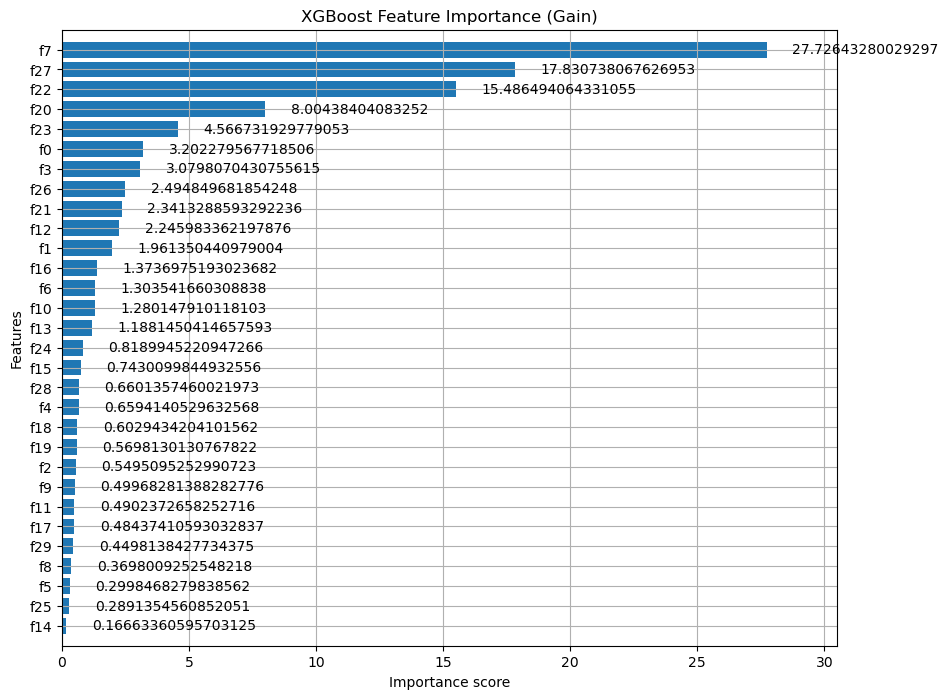

In [13]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(xgb_clf, ax=ax, height=0.8, importance_type='gain')
plt.title("XGBoost Feature Importance (Gain)")
plt.show()